In [2]:
# Import necessary packages.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import torch
import os
import torch.nn as nn
from torchvision import models
import torchvision.transforms as transforms
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
import torch.utils.data as data
from torchvision.datasets import DatasetFolder, VisionDataset

# This is for the progress bar.
from tqdm.auto import tqdm
import random
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)

2.0.0


## **Transforms**
Torchvision provides lots of useful utilities for image preprocessing, data wrapping as well as data augmentation.

Please refer to PyTorch official website for details about different transforms.

In [32]:
# Normally, We don't need augmentations in testing and validation.
# All we need here is to resize the PIL image and transform it into Tensor.
test_tfm = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
image_size = (256,256)
# 
# However, it is also possible to use augmentation in the testing phase.
# You may use train_tfm to produce a variety of images and then test using ensemble methods
train_tfm = transforms.Compose([
    # Resize the image into a fixed shape (height = width = 128)
    transforms.Resize((256, 256)),
    # You may add some transforms here.
    # ToTensor() should be the last one of the transforms.
    transforms.Resize(image_size),
    transforms.RandomRotation(45),
    transforms.RandomCrop((230,230),padding_mode="edge"),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAdjustSharpness(1.5, p=0.5),
    transforms.RandomAutocontrast(p=0.5),
    transforms.RandomPosterize(5, p=0.5),
    transforms.RandomPerspective(distortion_scale=0.15,p=0.5),
    transforms.ElasticTransform(alpha=10.0),
    transforms.AugMix(1),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5,scale=(0.005,0.005),value=(random.random(),random.random(),random.random())),
    transforms.RandomErasing(p=0.5,scale=(0.005,0.005),value=(random.random(),random.random(),random.random())),
    transforms.RandomErasing(p=0.5,scale=(0.005,0.005),value=(random.random(),random.random(),random.random())),
    transforms.RandomErasing(p=0.5,scale=(0.005,0.005),value=(random.random(),random.random(),random.random())),
])

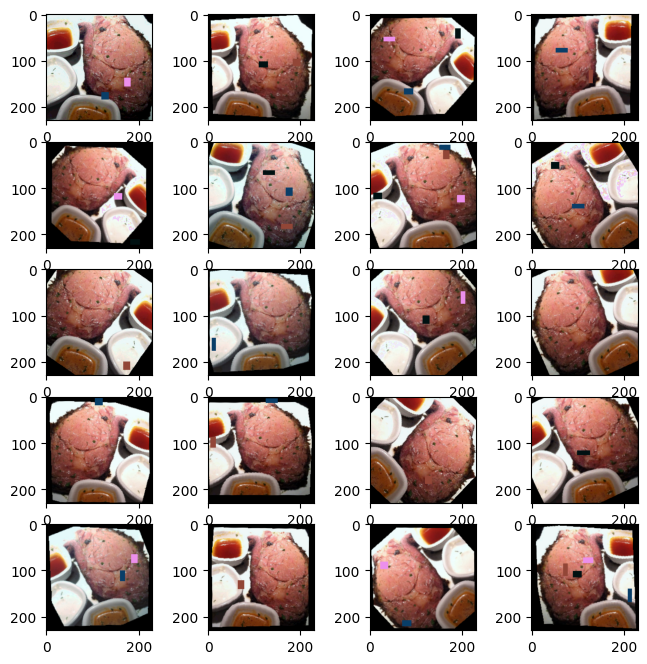

In [33]:
# im.show()
# print(type(train_tfm(im)))

    

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    im = Image.open("0003.jpg")
    im = train_tfm(im)
    fig.add_subplot(rows, columns, i)
    plt.imshow( im.permute(1, 2, 0))
    # plt.imshow(im)
plt.show()